In [54]:
import json
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.lines import Line2D
from matplotlib import font_manager

# Load data

In [55]:
with open('./data/sofascore/shots.json') as f:
    shotmap = json.load(f)

shots = pd.json_normalize(shotmap["shotmap"])
shots

,isHome,shotType,situation,bodyPart,goalMouthLocation,xg,id,time,addedTime,timeSeconds,...,draw.start.x,draw.start.y,draw.block.x,draw.block.y,draw.end.x,draw.end.y,draw.goal.x,draw.goal.y,goalType,xgot
0,True,block,regular,right-foot,low-centre,0.089518,2396401,90,7.0,5791,...,62.2,12.9,59.9,10.7,48.8,0,48.8,81.0,NaN,NaN
1,False,goal,assisted,right-foot,low-right,0.186681,2396400,90,5.0,5674,...,57.3,2.6,NaN,NaN,54.0,0,54.0,88.6,regular,0.7595
2,True,miss,assisted,head,close-right,0.195696,2396398,90,3.0,5557,...,47.9,7.7,NaN,NaN,58.7,0,58.7,84.7,NaN,NaN
3,True,goal,assisted,left-foot,low-left,0.134803,2396394,90,2.0,5474,...,54.2,9.1,NaN,NaN,47.4,0,47.4,81.0,regular,0.2616
4,True,miss,assisted,right-foot,close-right,0.024742,2396393,90,1.0,5415,...,41.9,24.8,NaN,NaN,58.7,0,58.7,86.1,NaN,NaN
5,False,miss,assisted,right-foot,high,0.380244,2396390,90,NaN,5377,...,51.9,8.0,NaN,NaN,50.9,0,50.9,36.1,NaN,NaN
6,False,block,regular,right-foot,low-left,0.009018,2396392,89,NaN,5336,...,36.2,26.6,42.1,11.8,46.7,0,46.7,81.0,NaN,NaN
7,True,miss,assisted,right-foot,close-high,0.132701,2396383,89,NaN,5280,...,48.3,9.5,NaN,NaN,46.6,0,46.6,41.7,NaN,NaN
8,True,block,assisted,head,low-right,0.078557,2396391,88,NaN,5276,...,48.9,8.6,51.6,3.8,53.2,0,53.2,81.0,NaN,NaN
9,True,miss,assisted,head,close-high,0.409941,2396379,86,NaN,5152,...,46.8,4.2,NaN,NaN,45.0,0,45.0,47.2,NaN,NaN


In [56]:
# Barcelona cumulative xG
home_xg_cum = shots[shots["isHome"] == True][["isHome", "shotType", "xg", "timeSeconds", "player.name"]]
home_xg_cum["minute"] = round(home_xg_cum["timeSeconds"]/60).astype(int)
home_xg_cum.sort_values(by="minute", inplace=True)
home_xg_cum["xg_cum"] = home_xg_cum["xg"].cumsum()

# Girona cumulative xG
away_xg_cum = shots[shots["isHome"] == False][["isHome", "shotType", "xg", "timeSeconds", "player.name"]]
away_xg_cum["minute"] = round(away_xg_cum["timeSeconds"]/60).astype(int)
away_xg_cum.sort_values(by="minute", inplace=True)
away_xg_cum["xg_cum"] = away_xg_cum["xg"].cumsum()
away_xg_cum

,isHome,shotType,xg,timeSeconds,player.name,minute,xg_cum
45,False,miss,0.082762,103,David López,2,0.082762
43,False,save,0.073209,316,Viktor Tsygankov,5,0.155971
41,False,goal,0.463223,692,Artem Dovbyk,12,0.619194
36,False,miss,0.078364,1380,Artem Dovbyk,23,0.697557
35,False,save,0.034673,1593,Miguel Gutiérrez,27,0.732230
30,False,miss,0.167872,2323,Miguel Gutiérrez,39,0.900103
29,False,goal,0.098326,2399,Miguel Gutiérrez,40,0.998429
21,False,miss,0.122377,3542,Viktor Tsygankov,59,1.120805
20,False,miss,0.038351,3607,Yan Couto,60,1.159156
13,False,goal,0.387802,4799,Valery Fernández,80,1.546957


In [57]:
home_goals = home_xg_cum[home_xg_cum["shotType"] == "goal"][["isHome", "minute", "player.name", "xg_cum"]]
home_goals["scorechart"] = home_goals["minute"].astype(str) + "'" + " " + home_goals["player.name"]
home_goal_count = len(home_goals)

away_goals = away_xg_cum[away_xg_cum["shotType"] == "goal"][["isHome", "minute", "player.name", "xg_cum"]]
away_goals["scorechart"] = away_goals["minute"].astype(int).astype(str) + "'" + " " + away_goals["player.name"]
away_goal_count = len(away_goals)
away_goals


,isHome,minute,player.name,xg_cum,scorechart
41,False,12,Artem Dovbyk,0.619194,12' Artem Dovbyk
29,False,40,Miguel Gutiérrez,0.998429,40' Miguel Gutiérrez
13,False,80,Valery Fernández,1.546957,80' Valery Fernández
1,False,95,Cristhian Stuani,2.476852,95' Cristhian Stuani


In [58]:
home_xg_total = round(home_xg_cum["xg"].sum(), 2).astype(str)
away_xg_total = round(away_xg_cum["xg"].sum(), 2).astype(str)

# Plot xG flow-chart

In [59]:
def set_plot_title(suptitle, title):    
    plt.suptitle(suptitle, fontsize=20, fontproperties=font_properties, y=1)
    plt.title(title, fontsize=14, fontproperties=font_properties, color="gray", pad=20)

In [60]:
def annotate_goals(goals):
    for i, row in goals.iterrows():
        facecolor = "blue" if row["isHome"] else "red"
        
        plt.text(
            row["minute"], 
            row["xg_cum"] + 0.2, 
            row["scorechart"], 
            ha="center", 
            va="center", 
            fontsize=10, 
            color="white", 
            bbox=dict(
                facecolor=facecolor,
                edgecolor="None",
                boxstyle="round,pad=0.2"
            )
        )
        

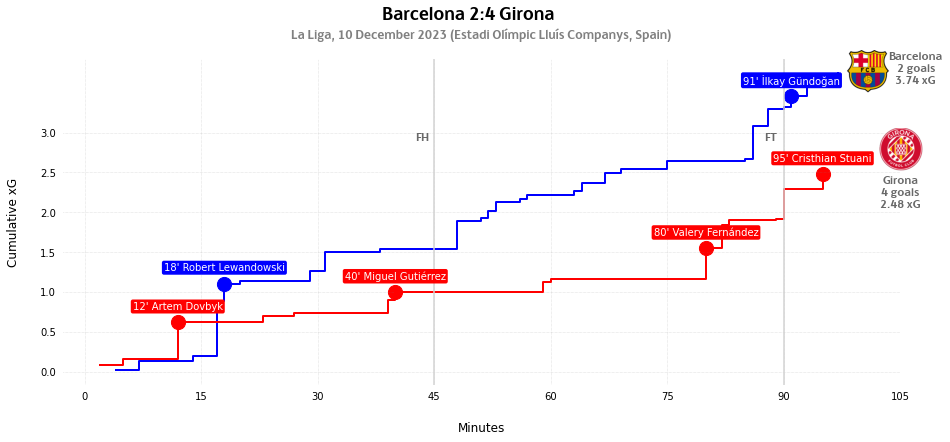

In [61]:
fig, ax = plt.subplots(figsize=(15,6))

font_properties = font_manager.FontProperties(fname="./fonts/Champions-Bold.ttf")

set_plot_title(
    suptitle="Barcelona 2:4 Girona", 
    title="La Liga, 10 December 2023 (Estadi Olímpic Lluís Companys, Spain)"
)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

ax.step(x=home_xg_cum["minute"], y=home_xg_cum["xg_cum"], where="post", color="blue", label=f"Barcelona {home_xg_total}", linewidth=2)  
ax.step(x=away_xg_cum["minute"], y=away_xg_cum["xg_cum"], where="post", color="red", label= f"Girona {away_xg_total}", linewidth=2)

ax.scatter(x=home_goals["minute"], y=home_goals["xg_cum"], marker="o", s=200, color="blue")
ax.scatter(x=away_goals["minute"], y=away_goals["xg_cum"], marker="o", s=200, color="red")

plt.xticks([0, 15, 30, 45, 60, 75, 90, 105])
plt.yticks([0, 0.5, 1, 1.5, 2, 2.5, 3])

ax.tick_params(axis="both", which="both", bottom=False, top=False, left=False, right=False)
ax.grid(True, linestyle="dotted", alpha=0.5, color="gray", linewidth=0.5)

ax.axvline(x=45, color="lightgray")
ax.axvline(x=90, color="lightgray")
plt.text(42.5, 2.9, "FH", color="dimgray", fontsize=13, fontproperties=font_properties)
plt.text(87.5, 2.9, "FT", color="dimgray", fontsize=13, fontproperties=font_properties)

annotate_goals(home_goals)
annotate_goals(away_goals)

stat_text_options = dict(ha="center", va="center", color="dimgray", fontsize=13, fontproperties=font_properties)
plt.text(107, 3.95, "Barcelona", **stat_text_options)
plt.text(107, 3.8, f"{home_goal_count} goals", **stat_text_options)
plt.text(107, 3.65, f"{home_xg_total} xG", **stat_text_options)

plt.text(105, 2.4, "Girona", **stat_text_options)
plt.text(105, 2.25, f"{away_goal_count} goals", **stat_text_options)
plt.text(105, 2.1, f"{away_xg_total} xG", **stat_text_options)

plt.ylabel("Cumulative xG", fontsize=12, labelpad=20)
plt.xlabel("Minutes", fontsize=12, labelpad=20)

home_logo = mpimg.imread("./img/Barcelona.png")
ax_home_logo = fig.add_axes([0.82, 0.8, 0.1, 0.1])
ax_home_logo.imshow(home_logo)
ax_home_logo.axis("off")

away_logo = mpimg.imread("./img/Girona.png")
ax_away_logo = fig.add_axes([0.85, 0.62, 0.1, 0.1])
ax_away_logo.imshow(away_logo)
ax_away_logo.axis("off")

plt.savefig("./img/Cumulative_xg.png", dpi=300, bbox_inches="tight")

plt.show()